In [1]:
#필요모듈
import pandas as pd
import numpy as np
import random

In [2]:
#여러변수출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#### 데이터 프레임 병합
- pandas는 두개 이상의 데이터 프레임을 하나로 합치는
- 병합(merge)이나 연결(concate)을 지원한다.

#### merge 명령을 사용한 데이터 프레임 병합
- merge : 
    - 두개의 데이터 프레임의 공통 열 이나 인덱스를 기준으로
    - 두개의 데이터프레임을 합친다.
    - 이때 기준이되는 열 데이터를 key라고 부른다.

#### 형식
- df.merge(df1) : 두 df를 병합시켜 준다.
- 기본은 inner join : 양쪽에 동일하게 존재하는 키만 표시
- key : 기준열을 의미
    -  실제 데이터 필드거나 행 인덱스 일 수 있다.
- 병합방식
    - inner join :  양쪽 df에서 모두 키가 존재하는 data만표시
    - outer join :  한쪽에만 키가 존재하면 data를 표시
    - 병합방식을 설정 : how=inner(생략가능), how=outer 


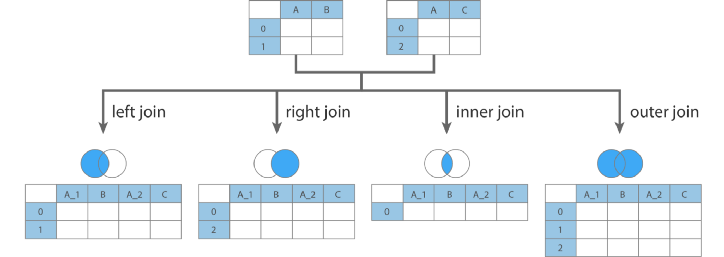
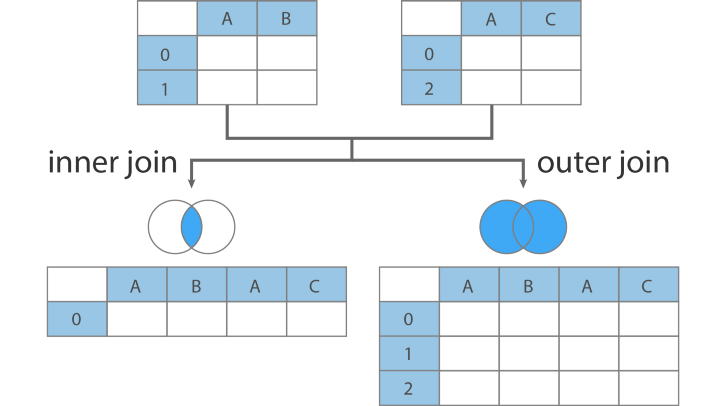

![](join_inout.PNG)

In [3]:
#예시 df 생성 - 고객 정보를 담고 있는 df
df1 =pd.DataFrame({
    '고객번호' : [1001,1002,1003,1004,1005,1006,1007],
    '이름' : ['둘리','도우너','또치','길동','희동','마이콜','영희']
        },
    columns=['고객번호','이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [4]:
#예제 df 생성 - 예금 정보 df
df2 = pd.DataFrame({
    '고객번호':[1001,1001,1005,1006,1008,1001],
    '금액' : [10000,20000,15000,5000,100000,30000]
},columns=['고객번호','금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


- merge 명령으로 두 df를 병합하는 문법
    - 모든 인수 생략(병합 df를 제외한) 공통 이름을 갖고 있는 열
    - '고객번호'가 키가 됨
    - 양쪽에 모두 존재하는 키의 data만 보여주는 inner join 방식을 사용

In [6]:
df1.head(1)
df2.head(1)
# 두 df의 공통열(같은 이름을 갖는 컬럼) : 고객번호
df1.merge(df2) # key = 생략 공통열을 기준으로 inner join 실행
pd.merge(df1,df2)

,고객번호,이름
0,1001,둘리


,고객번호,금액
0,1001,10000


,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


- outer join 방식은 키 값이 한쪽에만 있어도 데이터를 보여 줌
    - pd.merge(df1,df2, how = 'outer')
    - 어느 한 df에 데이터가 존재하지 않으면 NaN으로 표시됨

In [8]:
# outer join :  키 값이 한쪽에만 있어도 데이터를 출력
# 도우너, 또치, 길동이, 영희는 은행 회원이기는 하지만 예금을 하지 않은 고객
# 고객번호 1008고객은 은행회원이 아닌데 예금을 한 고객 
pd.merge(df1,df2,  how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [ ]:
pd.merge(df1,df2,how='outer')


- how = inner/outer/left/right
    - how=left : 왼쪽 df에 있는 모든 키의 데이터는 표시
    - how=right : 오른쪽 df 에 있는 모든 키의 데이터는 표시

In [11]:
pd.merge(df1,df2,how='left') # 은행의 모든 고객의 예금정보를 확인
pd.merge(df1,df2,how='right') # 예끔을 한 모든 고객의 예금정보와 고객정보 확인


,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [12]:
df1.merge(df2,how='left') # 은행의 모든 고객의 예금정보를 확인
df2.merge(df1,how='right') # 예금을 한 모든 고객의 예금정보와 고객정보 확인

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


,고객번호,금액,이름
0,1001,10000.0,둘리
1,1001,20000.0,둘리
2,1001,30000.0,둘리
3,1002,NaN,도우너
4,1003,NaN,또치
5,1004,NaN,길동
6,1005,15000.0,희동
7,1006,5000.0,마이콜
8,1007,NaN,영희


- 동일한 키 값이 있는 경우
    - 키값이 같은 데이터가 여러개 있는 경우에는 있을 수 있는 모든 경우의 수를 따져서 조합을 만들어 낸다.

In [14]:
#예제 df 생성 
#열: 품종, 꽃잎길이
df1 = pd.DataFrame({
    '품종':['setosa','setosa','virginica','virginica'],
    '꽃잎길이':[1.4,1.3,1.5,1.3]
}, columns=['품종','꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [16]:
#열 : 품종, 꽃잎너비
df2 = pd.DataFrame({
    '품종': ['setosa','virginica','virginica','versicolor'],
    '꽃잎너비':[0.4,0.3,0.5,0.3]
},columns=['품종','꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


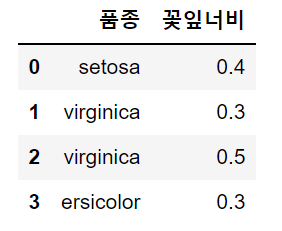
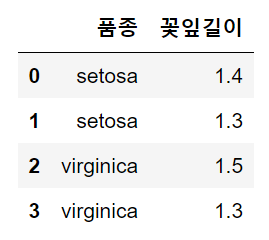

- df1과 df2 를 병합


    - 위 데이터에서 키 값 setosa에 대해
        - df1에는 1.4와 1.3 2개의 데이터가 있고
        - df2에는 0.4라는 1개의 데이터가 있으므로
        - 병합 데이터에는 setosa가 (1.4,0.4)(1.3,0.4)의 2 경우가 표현된다.
        

    - 키값 virginica의 경우에는 df1에 2개 df2에 2개의 데이터가 있으므로
        - 2개와 2개의 조합에 의해 4개의 데이터가 표현된다.

In [17]:
df1.head(1)
df2.head(1)
pd.merge(df1,df2)

,품종,꽃잎길이
0,setosa,1.4


,품종,꽃잎너비
0,setosa,0.4


,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


- key
- 두 데이터 프레임에서 이름이 같은 열은 모두 키가 될 수 있다.
- 이름이 같아도 키가되면 안되는 열이 있으면 on 인수로 기준열을 명시해야 한다.

In [18]:
# 예제 df
df1 = pd.DataFrame({
    '고객명':['춘향','춘향','몽룡'],
    '날짜' : ['2018-01-01','2018-01-02','2018-01-01'],
    '데이터':[20000,30000,100000]
})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [19]:
df2 = pd.DataFrame({
    '고객명':['춘향','몽룡'],
    '데이터':['여자','남자']
})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [20]:
df1.head(1)
df2.head(1)
# 두 df에 같은 이름의 컬럼이 있음
# 단, 데이터 컬럼은 값의 의미가 다름(키로 사용되면 안됨)

,고객명,날짜,데이터
0,춘향,2018-01-01,20000


,고객명,데이터
0,춘향,여자


In [21]:
# 기준열을 직접 지정
# 반환 결과에 동일 필드명이 있을 경우  필드명_x, 필드명_y로 표현되어짐
pd.merge(df1,df2,on='고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


- 기준열을 직접 지정 : on=기준열 이름
    - 반환 결과에 동일 필드명이 있을경우에는 필드명_x, 필드명_y로 필드명을 변경해서 표현한다.

In [22]:
pd.merge(df1,df2,on='고객명',how='outer')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


### 같은 이름의 열이 없는 경우
- 키가 되는 기준열이 두 데이터 프레임에서 다르게 나타나면
    - left_on, right_on 인수를 사용해서 기준열을 명시해야 함

In [87]:
df1=pd.DataFrame({
    '이름' :['영희','철수','철수'],
    '성적' :[90,80,80]
})
df2 = pd.DataFrame({
    '성명' :['영희','영희','철수'],
    '성적2':[100,80,90]
})
df1.head(1)
df2.head(1)

,이름,성적
0,영희,90


,성명,성적2
0,영희,100


In [88]:
# 양쪽 df의 기준이 되는 열의 이름이 다름
pd.merge(df1,df2,left_on='이름',right_on='성명')
# 결과는 양쪽 필드명이 다르기 때문에 기준열로 설정한 두 필드 모두 반환 

,이름,성적,성명,성적2
0,영희,90,영희,100
1,영희,90,영희,80
2,철수,80,철수,90
3,철수,80,철수,90


- 일반 데이터 열이 아닌 인덱스를 기준으로 merge 할 수 도 있음
    - 인덱스를 기준열로 사용하려면
        - left_index = True 또는
        - right_index = True 설정을 하게 됨

In [89]:
df1 = pd.DataFrame({
    '도시': ['서울','서울','서울','부산','부산'],
    '연도': [2000,2005,2010,2000,2005],
    '인구':[9853972,9762546,9631482,3655437,3512547]    
})
df2=pd.DataFrame(
    np.arange(12).reshape((6,2)),
    index=[['부산','부산','서울','서울','서울','서울'],
          [2000,2005,2000,2005,2010,2015]],
    columns=['데이터1','데이터2']
)
df1
df2
df2.loc['부산'].loc[2000]

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

데이터1    0
데이터2    1
Name: 2000, dtype: int32

In [90]:
df2.index

MultiIndex([('부산', 2000),
            ('부산', 2005),
            ('서울', 2000),
            ('서울', 2005),
            ('서울', 2010),
            ('서울', 2015)],
           )

In [91]:
df1.head(1)
df2.head(2)

,도시,연도,인구
0,서울,2000,9853972


데이터1  데이터2
부산 2000     0     1
   2005     2     3

In [92]:
pd.merge(df1,df2, left_on=['도시','연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [93]:
df1 = pd.DataFrame(
[[1.,2.],[3.,4.],[5.,6.]],
index=['a','c','e'],
columns=['서울','부산'])
df1

df2=pd.DataFrame(
[[7.,8.],[9.,10.],[11.,12.],[13.,14.]],
    index=['b','c','d','e'],
columns=['대구','광주'])
df2

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


- 양쪽 데이터프레임에 key가 모두 인덱스 인 경우

In [94]:
pd.merge(df1,df2,left_index=True,right_index=True, how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


#### merge 명령어 대신 join 메서드를 사용가능
- 사용 방법은 동일

In [95]:
df1.join(df2,how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


### concat 명령을 사용한 데이터 연결

     pd.concat(objs,  # Series, DataFrame, Panel object  
        axis=0,  # 0: 위+아래로 합치기, 1: 왼쪽+오른쪽으로 합치기   
        join='outer', # 'outer': 합집합(union), 'inner': 교집합(intersection)  
        ignore_index=False,  # False: 기존 index 유지, True: 기존 index 무시  
        keys=None, # 계층적 index 사용하려면 keys 튜플 입력) 
        


- concat 명령을 사용하면 기준열 없이 데이터를 연결한다.
- 기본은 위 아래로 데이터 행 결합(row bind)  axis 속성을 1로 설정하면 열 결합(column bind)을 수행한다

- 단순히 두 시리즈나 데이터프레임을 연결하기 때문에 인덱스 값이 중복될 수 있다.


### pd.concat([df1,df2],axis=0)
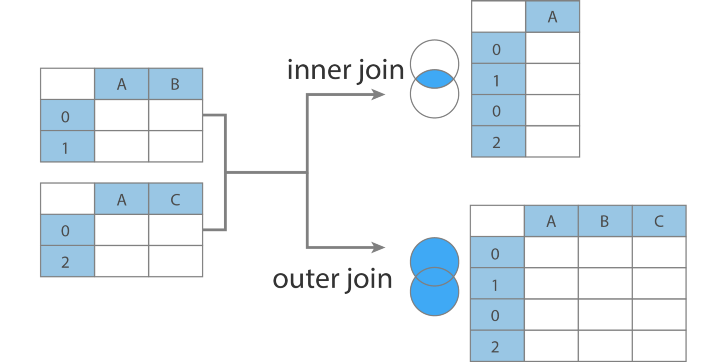

### pd.concat([df1,df2],axis=1)
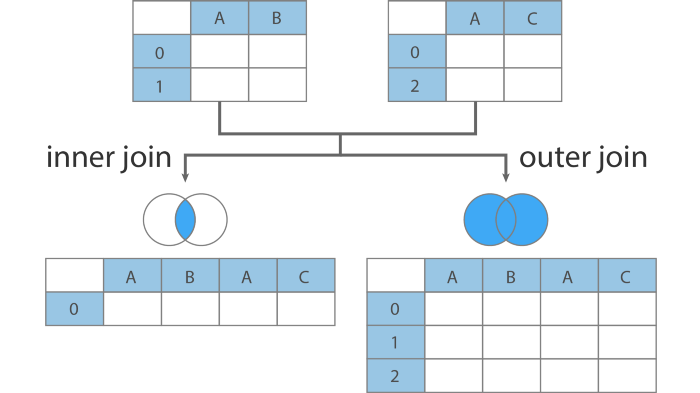

In [96]:
#두 시리즈 데이터 연결
s1=pd.Series([0,1],index=['A','B'])
s2=pd.Series([2,3,4],index=['A','B','C'])
s1
s2

A    0
B    1
dtype: int64

A    2
B    3
C    4
dtype: int64

In [97]:
# 두 시리즈 연결
pd.concat([s1,s2])

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [98]:
# # concat 연결
# df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
#                     'B': ['B0', 'B1', 'B2', 'B3'],
#                     'C': ['C0', 'C1', 'C2', 'C3'],
#                     'D': ['D0', 'D1', 'D2', 'D3']},
#                    index=[0, 1, 2, 3])

# df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
#                     'B': ['B4', 'B5', 'B6', 'B7'],
#                     'C': ['C4', 'C5', 'C6', 'C7'],
#                     'D': ['D4', 'D5', 'D6', 'D7']},
#                    index=[4, 5, 6, 7])

# df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
#                     'B': ['B8', 'B9', 'B10', 'B11'],
#                     'C': ['C8', 'C9', 'C10', 'C11'],
#                     'D': ['D8', 'D9', 'D10', 'D11']},
#                    index=[8, 9, 10, 11])
# df1
# df2
# df3

In [99]:
# concat 연결
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'E': ['C4', 'C5', 'C6', 'C7'],
                    'F': ['D4', 'D5', 'D6', 'D7']},
                   index=[0, 1, 2, 3])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'O': ['D8', 'D9', 'D10', 'D11']},
                   index=[1,2,3,4])
df1
df2
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,E,F
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


,A,B,C,O
1,A8,B8,C8,D8
2,A9,B9,C9,D9
3,A10,B10,C10,D10
4,A11,B11,C11,D11


In [100]:
# concat() : 위 아래로 단순 병합
result = pd.concat([df1,df2,df3],join='inner')
result = pd.concat([df1,df2,df3],join='outer')
result

,A,B,C,D,E,F,O
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4,NaN
1,A5,B5,NaN,NaN,C5,D5,NaN
2,A6,B6,NaN,NaN,C6,D6,NaN
3,A7,B7,NaN,NaN,C7,D7,NaN
1,A8,B8,C8,NaN,NaN,NaN,D8
2,A9,B9,C9,NaN,NaN,NaN,D9


In [101]:
result = pd.concat([df1,df2,df3],join='outer',keys=['x','y','z'])
# result.index
result.loc['x']
result.loc['x'].loc[0,'A']

,A,B,C,D,E,F,O
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN


'A0'

In [102]:
# 3개의 데이터프레임에서 공통적으로 나타나는 열만 표현
result = pd.concat([df1,df2,df3],join='inner',keys=['x','y','z'])
result

A    B
x 0   A0   B0
  1   A1   B1
  2   A2   B2
  3   A3   B3
y 0   A4   B4
  1   A5   B5
  2   A6   B6
  3   A7   B7
z 1   A8   B8
  2   A9   B9
  3  A10  B10
  4  A11  B11

- join = 'inner' : 공통열만 표현

In [103]:
result = pd.concat([df1,df2,df3],join='inner')
result

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7
1,A8,B8
2,A9,B9


- ignore_index = True : 기존 인덱스 제거 후 제로베이스 인덱스 설정

In [104]:
result = pd.concat([df1,df2,df3],join='inner',ignore_index = True)
result

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5
6,A6,B6
7,A7,B7
8,A8,B8
9,A9,B9


- keys=[] : 상위레벨 인덱스 설정

In [105]:
result = pd.concat([df1,df2,df3],join='outer',keys=['x','y','z'])
result

A    B    C    D    E    F    O
x 0   A0   B0   C0   D0  NaN  NaN  NaN
  1   A1   B1   C1   D1  NaN  NaN  NaN
  2   A2   B2   C2   D2  NaN  NaN  NaN
  3   A3   B3   C3   D3  NaN  NaN  NaN
y 0   A4   B4  NaN  NaN   C4   D4  NaN
  1   A5   B5  NaN  NaN   C5   D5  NaN
  2   A6   B6  NaN  NaN   C6   D6  NaN
  3   A7   B7  NaN  NaN   C7   D7  NaN
z 1   A8   B8   C8  NaN  NaN  NaN   D8
  2   A9   B9   C9  NaN  NaN  NaN   D9
  3  A10  B10  C10  NaN  NaN  NaN  D10
  4  A11  B11  C11  NaN  NaN  NaN  D11

- 다중 인덱스인 경우 데이터 접근 : .연산자를 이용한 체인 인덱싱


In [107]:
result.loc['y'].loc[1]
result.loc['y'].loc[1:1] #df형태
result.loc['y'].loc[1:2]

A     A5
B     B5
C    NaN
D    NaN
E     C5
F     D5
O    NaN
Name: 1, dtype: object

,A,B,C,D,E,F,O
1,A5,B5,NaN,NaN,C5,D5,NaN


,A,B,C,D,E,F,O
1,A5,B5,NaN,NaN,C5,D5,NaN
2,A6,B6,NaN,NaN,C6,D6,NaN


#### concate를 이용한 열 병합 
    - axis=1 설정
    - pd.concat([df1,df2],axis=1,join='inner/outer')
    - 데이터프레임들의 열을 결합한다
    - 모든행을 표시하고 해당 행의 데이터가 없는 열의 원소는 NaN으로 표시된다 : 기본설정(join='outer')
    - 결합하는 데이터프레임에 중복되는 인덱스의 행만 표시한다 : join='inner'

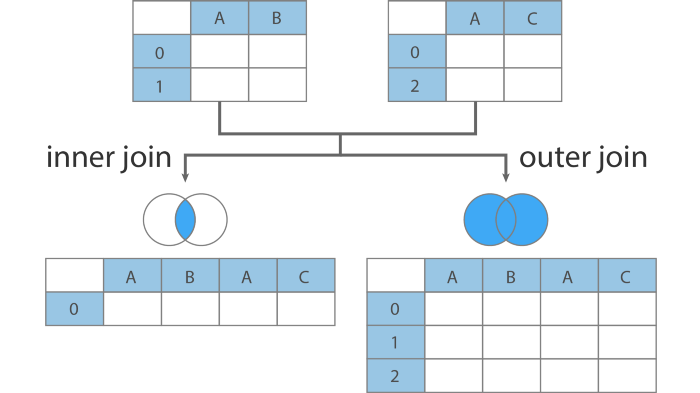

In [112]:
# 예제 df 생성

df1=pd.DataFrame(
    np.arange(6).reshape(3,2),
    index=['a','b','c'],
    columns=['데이터1','데이터2']
)
df1
df2=pd.DataFrame(
    5+np.arange(4).reshape(2,2),
    index=['a','c'],
    columns=['데이터2','데이터4']
)
df2


,데이터1,데이터2
a,0,1
b,2,3
c,4,5


,데이터2,데이터4
a,5,6
c,7,8


In [113]:
# 열방향 결합
# join 생략 outer
pd.concat([df1,df2],axis=1)

,데이터1,데이터2,데이터2,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


In [114]:
pd.concat([df1,df2]) # axis생략 : 0 기본값 (행방향 결합)

,데이터1,데이터2,데이터4
a,0.0,1,NaN
b,2.0,3,NaN
c,4.0,5,NaN
a,NaN,5,6.0
c,NaN,7,8.0


In [119]:
test =pd.concat([df1,df2], axis=1, join='inner')
test

,데이터1,데이터2,데이터2,데이터4
a,0,1,5,6
c,4,5,7,8


In [120]:
test.데이터2

,데이터2,데이터2
a,1,5
c,5,7


In [121]:
test =pd.concat([df1,df2], axis=1, join='inner',keys=['X','Y'])
test
test.X
test.X.데이터2

X         Y     
  데이터1 데이터2 데이터2 데이터4
a    0    1    5    6
c    4    5    7    8

,데이터1,데이터2
a,0,1
c,4,5


a    1
c    5
Name: 데이터2, dtype: int32

**df의 concat을 활용한 행 추가**

In [69]:
df1=pd.DataFrame(
    np.arange(6).reshape(3,2),
    index=['a','b','c'],
    columns=['데이터1','데이터2']
)

In [70]:
df1

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


In [71]:
df2 = pd.DataFrame([[5,4]], index=['d'], columns=['데이터1','데이터2'])
df2

,데이터1,데이터2
d,5,4


In [72]:
pd.concat([df1,df2])

,데이터1,데이터2
a,0,1
b,2,3
c,4,5
d,5,4


In [27]:
pd.__version__

'1.2.0'